In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss
from sklearn.metrics import log_loss
from scipy import stats
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import calibration_curve

In [13]:
#No need to run 
# df1 = pd.read_csv(r'C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part 2\mlb-odds-2021.csv')
# df2 = pd.read_csv(r'C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part 2\mlb-odds-2020.csv')

# # Concatenate the dataframes
# concatenated_df = pd.concat([df1, df2], ignore_index=True)

# concatenated_df.to_csv(r'C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part2.csv', index=False)
# concatenated_df

,Date,VH,Team,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,Final,Model 1,Model 2
0,401,V,PIT,2,1,0,0,1,0,1,0,0,5,183,190
1,401,H,CUB,1,0,1,0,0,0,0,1,0,3,-205,-210
2,401,V,ATL,0,0,0,0,0,0,2,0,0,2,-105,117
3,401,H,PHI,1,0,1,0,0,0,0,0,0,3,-105,-127
4,401,V,ARI,1,0,0,0,6,0,0,0,0,7,188,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,1023,N,TAM,0,0,0,0,1,0,0,0,1,2,135,145
6818,1024,N,LAD,1,0,1,0,1,1,2,1,0,7,-160,-158
6819,1024,N,TAM,0,0,0,1,1,3,1,0,2,8,144,148
6820,1025,N,LAD,2,1,0,0,1,0,0,0,0,4,-155,-160


In [17]:
# #No need to run
# def american_to_decimal(odds):
#     try:
#         odds = int(odds)  # Try to convert string to integer
#         if odds < 0:
#             decimal_odds = 1 + (100 / abs(odds))
#         else:
#             decimal_odds = 1 + (odds / 100)
#         return round(decimal_odds, 2)
#     except ValueError:
#         return None

# concatenated_df['Model 1 Decimal'] = concatenated_df['Model 1'].apply(american_to_decimal)
# concatenated_df['Model 2 Decimal'] = concatenated_df['Model 2'].apply(american_to_decimal)

# concatenated_df



,Date,VH,Team,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,Final,Model 1,Model 2,Model 1 Decimal,Model 2 Decimal
0,401,V,PIT,2,1,0,0,1,0,1,0,0,5,183,190,2.83,2.90
1,401,H,CUB,1,0,1,0,0,0,0,1,0,3,-205,-210,1.49,1.48
2,401,V,ATL,0,0,0,0,0,0,2,0,0,2,-105,117,1.95,2.17
3,401,H,PHI,1,0,1,0,0,0,0,0,0,3,-105,-127,1.95,1.79
4,401,V,ARI,1,0,0,0,6,0,0,0,0,7,188,205,2.88,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,1023,N,TAM,0,0,0,0,1,0,0,0,1,2,135,145,2.35,2.45
6818,1024,N,LAD,1,0,1,0,1,1,2,1,0,7,-160,-158,1.62,1.63
6819,1024,N,TAM,0,0,0,1,1,3,1,0,2,8,144,148,2.44,2.48
6820,1025,N,LAD,2,1,0,0,1,0,0,0,0,4,-155,-160,1.65,1.62


In [60]:
# # no need to run
# def decimal_to_implied_prob(odds):
#     return round (1/odds,3)
# concatenated_df['Model 1 Prob'] = concatenated_df['Model 1 Decimal'].apply(decimal_to_implied_prob)
# concatenated_df['Model 2 Prob'] = concatenated_df['Model 2 Decimal'].apply(decimal_to_implied_prob)

# concatenated_df.insert(0, 'ID', np.arange(len(concatenated_df)) // 2 + 1)

# concatenated_df.to_csv(r"C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part 2\combined_odds.csv")

# concatenated_df

In [56]:
# No need to run
# concatenated_df['Model 1 TProb'] = concatenated_df.groupby('ID')['Model 1 Prob'].transform('sum')
# concatenated_df['Model 2 TProb'] = concatenated_df.groupby('ID')['Model 2 Prob'].transform('sum')
# concatenated_df.to_csv(r"C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part 2\combined_odds.csv")

# concatenated_df

,Unnamed: 0.1,Unnamed: 0,ID,Date,VH,Team,1st,2nd,3rd,4th,...,9th,Final,Model 1,Model 2,Model 1 Decimal,Model 2 Decimal,Model 1 Prob,Model 2 Prob,Model 1 TProb,Model 2 TProb
0,0,0,1,401,V,PIT,2,1,0,0,...,0,5,183,190,2.83,2.90,0.353,0.345,1.024,1.021
1,1,1,1,401,H,CUB,1,0,1,0,...,0,3,-205,-210,1.49,1.48,0.671,0.676,1.024,1.021
2,2,2,2,401,V,ATL,0,0,0,0,...,0,2,-105,117,1.95,2.17,0.513,0.461,1.026,1.020
3,3,3,2,401,H,PHI,1,0,1,0,...,0,3,-105,-127,1.95,1.79,0.513,0.559,1.026,1.020
4,4,4,3,401,V,ARI,1,0,0,0,...,0,7,188,205,2.88,3.05,0.347,0.328,1.023,1.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,6817,6817,3409,1023,N,TAM,0,0,0,0,...,1,2,135,145,2.35,2.45,0.426,0.408,1.025,1.014
6818,6818,6818,3410,1024,N,LAD,1,0,1,0,...,0,7,-160,-158,1.62,1.63,0.617,0.613,1.027,1.016
6819,6819,6819,3410,1024,N,TAM,0,0,0,1,...,2,8,144,148,2.44,2.48,0.410,0.403,1.027,1.016
6820,6820,6820,3411,1025,N,LAD,2,1,0,0,...,0,4,-155,-160,1.65,1.62,0.606,0.617,1.023,1.017


In [58]:
concatenated_df=pd.read_csv(r"C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part 2\combined_odds.csv")

In [59]:
for index, row in concatenated_df.iterrows():
    if row['Model 1 TProb']<1:
        print (row)
for index, row in concatenated_df.iterrows():
    if row['Model 2 TProb']<1:
        print (row)

ID                  2781
Date                 817
VH                     V
Team                 CUB
1st                    1
2nd                    0
3rd                    0
4th                    0
5th                    0
6th                    4
7th                    0
8th                    x
9th                    x
Final                  5
Model 1               NL
Model 2             -118
Model 1 Decimal      NaN
Model 2 Decimal     1.85
Model 1 Prob         NaN
Model 2 Prob       0.541
Model 1 TProb        0.0
Model 2 TProb      1.022
Name: 5560, dtype: object
ID                  2781
Date                 817
VH                     H
Team                 STL
1st                    0
2nd                    2
3rd                    0
4th                    2
5th                    0
6th                    0
7th                    0
8th                    x
9th                    x
Final                  4
Model 1               NL
Model 2              108
Model 1 Decimal      NaN

In [60]:
ids_to_drop = [2781, 2801, 3157, 3209, 3211, 3212, 3214, 3218, 3220, 3223]

concatenated_df = concatenated_df[~concatenated_df['ID'].isin(ids_to_drop)]


##### 2781 no prediction from model 1

##### 2801 no prediction from model 1

##### 3157 no prediction from model 1

##### 3209 both models had two underdogs

##### 3211 both models had two underdogs

##### 3212 both models had acc_prob<1, but close to 1

##### 3214 both models had two underdogs

##### 3218 both models had two underdogs

##### 3220 both models had two underdogs

##### 3223 both models had two underdogs

In [62]:
concatenated_df

,ID,Date,VH,Team,1st,2nd,3rd,4th,5th,6th,...,9th,Final,Model 1,Model 2,Model 1 Decimal,Model 2 Decimal,Model 1 Prob,Model 2 Prob,Model 1 TProb,Model 2 TProb
0,1,401,V,PIT,2,1,0,0,1,0,...,0,5,183,190,2.83,2.90,0.353,0.345,1.024,1.021
1,1,401,H,CUB,1,0,1,0,0,0,...,0,3,-205,-210,1.49,1.48,0.671,0.676,1.024,1.021
2,2,401,V,ATL,0,0,0,0,0,0,...,0,2,-105,117,1.95,2.17,0.513,0.461,1.026,1.020
3,2,401,H,PHI,1,0,1,0,0,0,...,0,3,-105,-127,1.95,1.79,0.513,0.559,1.026,1.020
4,3,401,V,ARI,1,0,0,0,6,0,...,0,7,188,205,2.88,3.05,0.347,0.328,1.023,1.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,3409,1023,N,TAM,0,0,0,0,1,0,...,1,2,135,145,2.35,2.45,0.426,0.408,1.025,1.014
6818,3410,1024,N,LAD,1,0,1,0,1,1,...,0,7,-160,-158,1.62,1.63,0.617,0.613,1.027,1.016
6819,3410,1024,N,TAM,0,0,0,1,1,3,...,2,8,144,148,2.44,2.48,0.410,0.403,1.027,1.016
6820,3411,1025,N,LAD,2,1,0,0,1,0,...,0,4,-155,-160,1.65,1.62,0.606,0.617,1.023,1.017


In [63]:
concatenated_df['Winner'] = 0

for match_id in concatenated_df['ID'].unique():
    match_rows = concatenated_df[concatenated_df['ID'] == match_id]  # Get the two rows for the same match
    team1_final = match_rows.iloc[0]['Final']
    team2_final = match_rows.iloc[1]['Final']
    
    if team1_final > team2_final:
        concatenated_df.loc[match_rows.index[0], 'Winner'] = 1  # Team 1 wins
    elif team2_final > team1_final:
        concatenated_df.loc[match_rows.index[1], 'Winner'] = 1  # Team 2 wins
concatenated_df

,ID,Date,VH,Team,1st,2nd,3rd,4th,5th,6th,...,Final,Model 1,Model 2,Model 1 Decimal,Model 2 Decimal,Model 1 Prob,Model 2 Prob,Model 1 TProb,Model 2 TProb,Winner
0,1,401,V,PIT,2,1,0,0,1,0,...,5,183,190,2.83,2.90,0.353,0.345,1.024,1.021,1
1,1,401,H,CUB,1,0,1,0,0,0,...,3,-205,-210,1.49,1.48,0.671,0.676,1.024,1.021,0
2,2,401,V,ATL,0,0,0,0,0,0,...,2,-105,117,1.95,2.17,0.513,0.461,1.026,1.020,0
3,2,401,H,PHI,1,0,1,0,0,0,...,3,-105,-127,1.95,1.79,0.513,0.559,1.026,1.020,1
4,3,401,V,ARI,1,0,0,0,6,0,...,7,188,205,2.88,3.05,0.347,0.328,1.023,1.027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,3409,1023,N,TAM,0,0,0,0,1,0,...,2,135,145,2.35,2.45,0.426,0.408,1.025,1.014,0
6818,3410,1024,N,LAD,1,0,1,0,1,1,...,7,-160,-158,1.62,1.63,0.617,0.613,1.027,1.016,0
6819,3410,1024,N,TAM,0,0,0,1,1,3,...,8,144,148,2.44,2.48,0.410,0.403,1.027,1.016,1
6820,3411,1025,N,LAD,2,1,0,0,1,0,...,4,-155,-160,1.65,1.62,0.606,0.617,1.023,1.017,1


In [12]:
sum=0
for index, row in concatenated_df.iterrows():
    sum=sum+row['Winner']
sum

3400

###### All matches (after we dropped some) are 3401 so we know one has a problem


###### prompt: i want to sum row["Winner"] and row+1["Winner"] for all pairs


In [64]:
sum_winner = 0
for index, row in concatenated_df.iterrows():
  if index + 1 < len(concatenated_df):  # Check if the next row exists
    next_row = concatenated_df.iloc[index + 1]
    if row["ID"] == next_row["ID"]:
      
      if row["Winner"]+next_row["Winner"] != 1:
        todrop=row["ID"]
        print("We found the problem")
        print(row)
        print(next_row)
concatenated_df = concatenated_df[~concatenated_df['ID'].isin([todrop])]

We found the problem
ID                  1361
Date                 717
VH                     V
Team                 MIA
1st                    0
2nd                    0
3rd                    0
4th                    0
5th                    0
6th                    0
7th                    0
8th                    0
9th                    2
Final                  2
Model 1              100
Model 2              111
Model 1 Decimal      2.0
Model 2 Decimal     2.11
Model 1 Prob         0.5
Model 2 Prob       0.474
Model 1 TProb      1.046
Model 2 TProb       1.02
Winner                 0
Name: 2720, dtype: object
ID                  1361
Date                 717
VH                     H
Team                 PHI
1st                    2
2nd                    0
3rd                    0
4th                    0
5th                    0
6th                    0
7th                    0
8th                    0
9th                    0
Final                  2
Model 1             -120
Mod

In [16]:
model1_avg_prob=concatenated_df["Model 1 TProb"].mean()
model2_avg_prob=concatenated_df["Model 2 TProb"].mean()
print(model1_avg_prob)
print(model2_avg_prob)
concatenated_df

1.0395570588235292
1.020615588235294


,Unnamed: 0,ID,Date,VH,Team,1st,2nd,3rd,4th,5th,...,Final,Model 1,Model 2,Model 1 Decimal,Model 2 Decimal,Model 1 Prob,Model 2 Prob,Model 1 TProb,Model 2 TProb,Winner
0,0,1,401,V,PIT,2,1,0,0,1,...,5,183,190,2.83,2.90,0.353,0.345,1.024,1.021,1
1,1,1,401,H,CUB,1,0,1,0,0,...,3,-205,-210,1.49,1.48,0.671,0.676,1.024,1.021,0
2,2,2,401,V,ATL,0,0,0,0,0,...,2,-105,117,1.95,2.17,0.513,0.461,1.026,1.020,0
3,3,2,401,H,PHI,1,0,1,0,0,...,3,-105,-127,1.95,1.79,0.513,0.559,1.026,1.020,1
4,4,3,401,V,ARI,1,0,0,0,6,...,7,188,205,2.88,3.05,0.347,0.328,1.023,1.027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,6817,3409,1023,N,TAM,0,0,0,0,1,...,2,135,145,2.35,2.45,0.426,0.408,1.025,1.014,0
6818,6818,3410,1024,N,LAD,1,0,1,0,1,...,7,-160,-158,1.62,1.63,0.617,0.613,1.027,1.016,0
6819,6819,3410,1024,N,TAM,0,0,0,1,1,...,8,144,148,2.44,2.48,0.410,0.403,1.027,1.016,1
6820,6820,3411,1025,N,LAD,2,1,0,0,1,...,4,-155,-160,1.65,1.62,0.606,0.617,1.023,1.017,1


#### After droping values due to missing predictions, negative house edge and one match that ended in a draw, 
#### we estimate that Model 1 offers 3.95% house edge and Model 2 offers 2.06% house edge on average.

In [65]:
model_1_log_loss = log_loss(concatenated_df['Winner'], concatenated_df['Model 1 Prob'])

model_2_log_loss = log_loss(concatenated_df['Winner'], concatenated_df['Model 2 Prob'])

print(f"Log Loss for Model 1: {model_1_log_loss}")
print(f"Log Loss for Model 2: {model_2_log_loss}")

best_model_log_loss = "Model 1" if model_1_log_loss < model_2_log_loss else "Model 2"
print(f"The best model based on Log Loss is: {best_model_log_loss}")

Log Loss for Model 1: 0.6741987044988611
Log Loss for Model 2: 0.6716025946274398
The best model based on Log Loss is: Model 2


In [66]:
winners_df = concatenated_df[concatenated_df['Winner'] == 1]

brier_scores_model_1 = []
brier_scores_model_2 = []

for index, row in winners_df.iterrows():
    brier_scores_model_1.append((row['Model 1 Prob'] - row['Winner'])**2)
    brier_scores_model_2.append((row['Model 2 Prob'] - row['Winner'])**2)

average_brier_score_model_1 = np.mean(brier_scores_model_1)
average_brier_score_model_2 = np.mean(brier_scores_model_2)

print(f"Average Brier Score for Model 1: {average_brier_score_model_1}")
print(f"Average Brier Score for Model 2: {average_brier_score_model_2}")

best_model = "Model 1" if average_brier_score_model_1 < average_brier_score_model_2 else "Model 2"
print(f"The best model based on Brier Score is: {best_model}")



Average Brier Score for Model 1: 0.22161081205882352
Average Brier Score for Model 2: 0.22958017529411764
The best model based on Brier Score is: Model 1


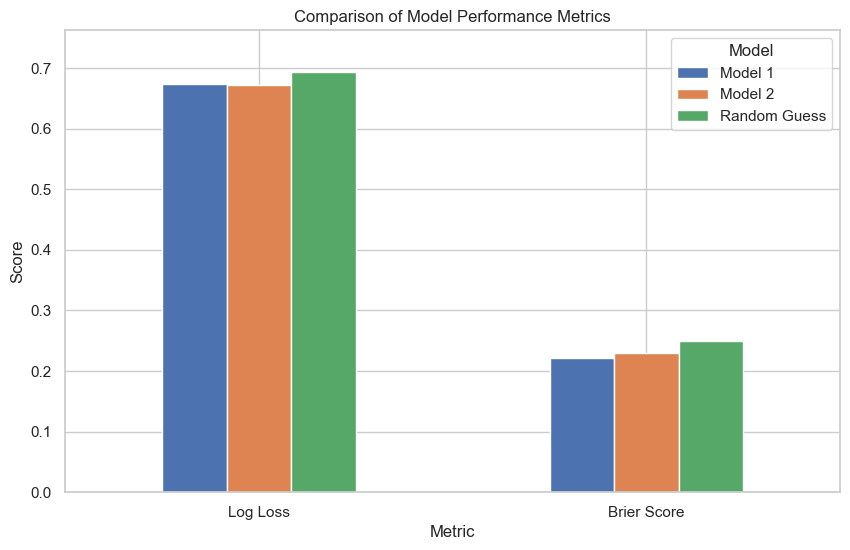

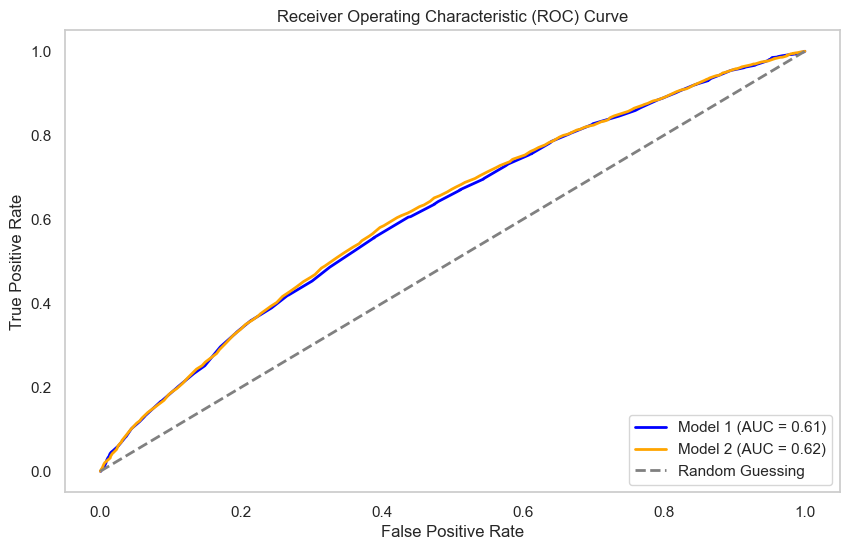

In [67]:
random_guess_log_loss = 0.693 
random_guess_brier_score = 0.25  

def plot_log_brier_scores(log_loss_model_1, log_loss_model_2, brier_score_model_1, brier_score_model_2):
    scores = {
        'Metric': ['Log Loss', 'Brier Score'],
        'Model 1': [log_loss_model_1, brier_score_model_1],
        'Model 2': [log_loss_model_2, brier_score_model_2],
        'Random Guess': [random_guess_log_loss, random_guess_brier_score]}
    
    
    scores_df = pd.DataFrame(scores)
    scores_df.set_index('Metric', inplace=True)

  
    scores_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Comparison of Model Performance Metrics')
    plt.ylabel('Score')
    plt.ylim(0, max(scores_df.max()) * 1.1)  # Set y-axis limit to slightly above the max score
    plt.xticks(rotation=0)
    plt.legend(title='Model', loc='upper right')
    plt.show()

plot_log_brier_scores(model_1_log_loss, model_2_log_loss, average_brier_score_model_1, average_brier_score_model_2)

def plot_roc_curve(y_true, prob_model_1, prob_model_2):
    fpr_model_1, tpr_model_1, _ = roc_curve(y_true, prob_model_1)
    roc_auc_model_1 = auc(fpr_model_1, tpr_model_1)

    fpr_model_2, tpr_model_2, _ = roc_curve(y_true, prob_model_2)
    roc_auc_model_2 = auc(fpr_model_2, tpr_model_2)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr_model_1, tpr_model_1, color='blue', lw=2, label='Model 1 (AUC = {:.2f})'.format(roc_auc_model_1))
    plt.plot(fpr_model_2, tpr_model_2, color='orange', lw=2, label='Model 2 (AUC = {:.2f})'.format(roc_auc_model_2))
    
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing')
    
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_roc_curve(concatenated_df['Winner'], concatenated_df['Model 1 Prob'], concatenated_df['Model 2 Prob'])



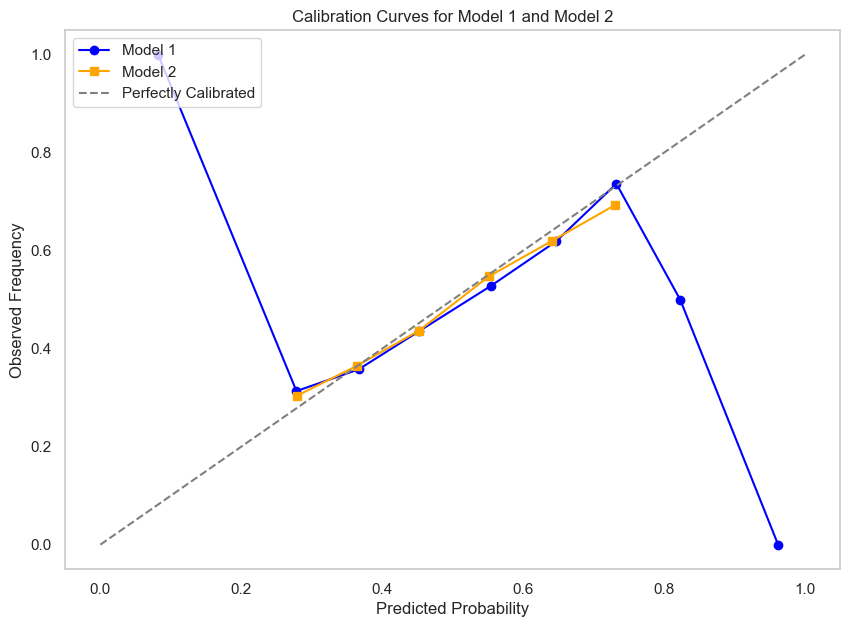

In [68]:
prob_true_model_1, prob_pred_model_1 = calibration_curve(concatenated_df['Winner'], concatenated_df['Model 1 Prob'], n_bins=10)
prob_true_model_2, prob_pred_model_2 = calibration_curve(concatenated_df['Winner'], concatenated_df['Model 2 Prob'], n_bins=10)

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

plt.plot(prob_pred_model_1, prob_true_model_1, marker='o', color='blue', label="Model 1")
plt.plot(prob_pred_model_2, prob_true_model_2, marker='s', color='orange', label="Model 2")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfectly Calibrated")

plt.title("Calibration Curves for Model 1 and Model 2")
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Frequency")
plt.legend(loc="upper left")
plt.grid()
plt.show()


###### Matchup with 'ID'=39 has a problem for Model 1, hence the major outliers in the above plot. 
###### Matchup with 'ID'=1465 has also a smaller problem, again for Model 1.
###### We will drop these rows because they are huge outliers and will mess up our results.
###### Taking into account that Model 1 also missed predicting odds for 3 more games, it may start raising concerns about its reliability. 
###### Note that in 7 more matches Model 1 predicted two underdogs (negative house edge), but that happened for Model 2 as well for the same matches.

In [91]:
concatenated_df = concatenated_df[concatenated_df['ID'] != 39]
concatenated_df = concatenated_df[concatenated_df['ID'] != 1465]

concatenated_df

,ID,Date,VH,Team,1st,2nd,3rd,4th,5th,6th,...,Final,Model 1,Model 2,Model 1 Decimal,Model 2 Decimal,Model 1 Prob,Model 2 Prob,Model 1 TProb,Model 2 TProb,Winner
0,1,401,V,PIT,2,1,0,0,1,0,...,5,183,190,2.83,2.90,0.353,0.345,1.024,1.021,1
1,1,401,H,CUB,1,0,1,0,0,0,...,3,-205,-210,1.49,1.48,0.671,0.676,1.024,1.021,0
2,2,401,V,ATL,0,0,0,0,0,0,...,2,-105,117,1.95,2.17,0.513,0.461,1.026,1.020,0
3,2,401,H,PHI,1,0,1,0,0,0,...,3,-105,-127,1.95,1.79,0.513,0.559,1.026,1.020,1
4,3,401,V,ARI,1,0,0,0,6,0,...,7,188,205,2.88,3.05,0.347,0.328,1.023,1.027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,3409,1023,N,TAM,0,0,0,0,1,0,...,2,135,145,2.35,2.45,0.426,0.408,1.025,1.014,0
6818,3410,1024,N,LAD,1,0,1,0,1,1,...,7,-160,-158,1.62,1.63,0.617,0.613,1.027,1.016,0
6819,3410,1024,N,TAM,0,0,0,1,1,3,...,8,144,148,2.44,2.48,0.410,0.403,1.027,1.016,1
6820,3411,1025,N,LAD,2,1,0,0,1,0,...,4,-155,-160,1.65,1.62,0.606,0.617,1.023,1.017,1


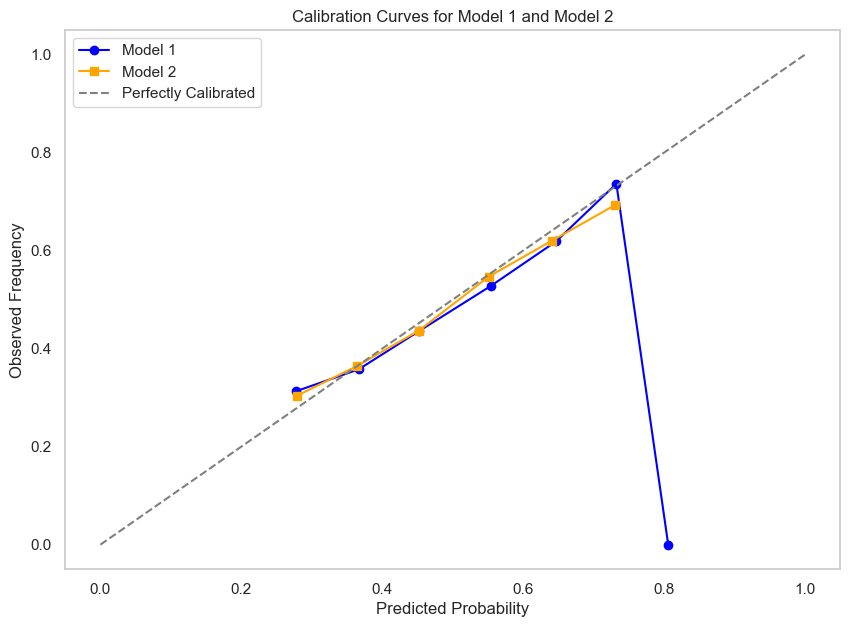

In [92]:
prob_true_model_1, prob_pred_model_1 = calibration_curve(concatenated_df['Winner'], concatenated_df['Model 1 Prob'], n_bins=10)
prob_true_model_2, prob_pred_model_2 = calibration_curve(concatenated_df['Winner'], concatenated_df['Model 2 Prob'], n_bins=10)

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

plt.plot(prob_pred_model_1, prob_true_model_1, marker='o', color='blue', label="Model 1")
plt.plot(prob_pred_model_2, prob_true_model_2, marker='s', color='orange', label="Model 2")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfectly Calibrated")

plt.title("Calibration Curves for Model 1 and Model 2")
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Frequency")
plt.legend(loc="upper left")
plt.grid()
plt.show()

###### Model 1 missed the prediction on its higher calculated probability event, hence the major outlier in the plot. After inspection, it turned out that there wasn't any obvious error caused by the model for its calculated odds, so there was no need to drop the rows of this match. It's just the structure of the plot that creates outliers even for a single matchup if the model was most confident and missed.

In [97]:
concatenated_df['House Edge 1'] = (concatenated_df['Model 1 TProb']-1) * 100
concatenated_df['House Edge 2'] = (concatenated_df['Model 2 TProb']-1) * 100

concatenated_df['House Edge 1'] = concatenated_df['House Edge 1'].round(2).astype(str) + '%'
concatenated_df['House Edge 2'] = concatenated_df['House Edge 2'].round(2).astype(str) + '%'

concatenated_df

,ID,Date,VH,Team,1st,2nd,3rd,4th,5th,6th,...,Model 2,Model 1 Decimal,Model 2 Decimal,Model 1 Prob,Model 2 Prob,Model 1 TProb,Model 2 TProb,Winner,House Edge 1,House Edge 2
0,1,401,V,PIT,2,1,0,0,1,0,...,190,2.83,2.90,0.353,0.345,1.024,1.021,1,2.4%,2.1%
1,1,401,H,CUB,1,0,1,0,0,0,...,-210,1.49,1.48,0.671,0.676,1.024,1.021,0,2.4%,2.1%
2,2,401,V,ATL,0,0,0,0,0,0,...,117,1.95,2.17,0.513,0.461,1.026,1.020,0,2.6%,2.0%
3,2,401,H,PHI,1,0,1,0,0,0,...,-127,1.95,1.79,0.513,0.559,1.026,1.020,1,2.6%,2.0%
4,3,401,V,ARI,1,0,0,0,6,0,...,205,2.88,3.05,0.347,0.328,1.023,1.027,0,2.3%,2.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,3409,1023,N,TAM,0,0,0,0,1,0,...,145,2.35,2.45,0.426,0.408,1.025,1.014,0,2.5%,1.4%
6818,3410,1024,N,LAD,1,0,1,0,1,1,...,-158,1.62,1.63,0.617,0.613,1.027,1.016,0,2.7%,1.6%
6819,3410,1024,N,TAM,0,0,0,1,1,3,...,148,2.44,2.48,0.410,0.403,1.027,1.016,1,2.7%,1.6%
6820,3411,1025,N,LAD,2,1,0,0,1,0,...,-160,1.65,1.62,0.606,0.617,1.023,1.017,1,2.3%,1.7%


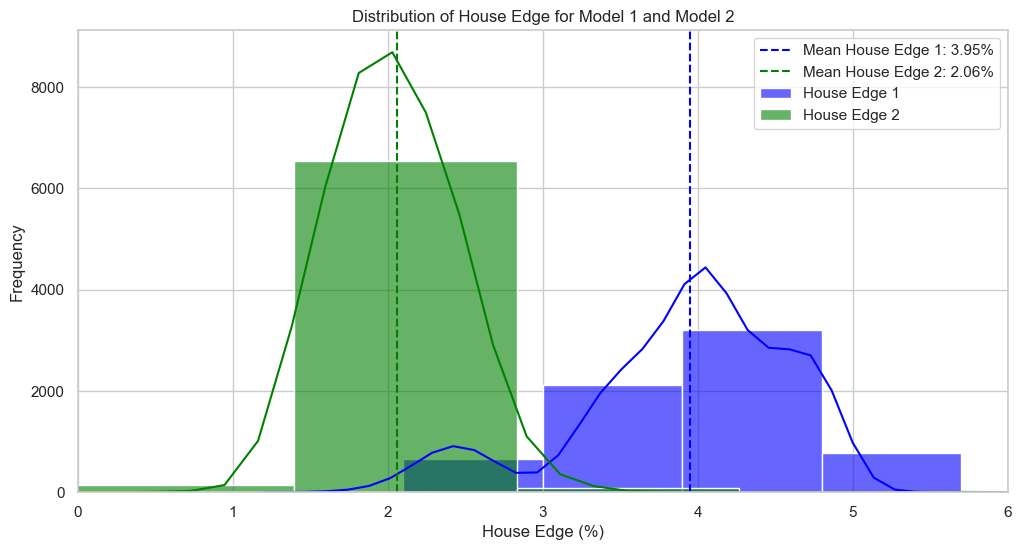

In [113]:
mean_house_edge_1 = concatenated_df['House Edge 1'].mean()
mean_house_edge_2 = concatenated_df['House Edge 2'].mean()

plt.figure(figsize=(12, 6))

sns.histplot(concatenated_df['House Edge 1'], kde=True, color='blue', label='House Edge 1', bins=30, alpha=0.6)
sns.histplot(concatenated_df['House Edge 2'], kde=True, color='green', label='House Edge 2', bins=30, alpha=0.6)

plt.xlim(0, 6)

plt.axvline(mean_house_edge_1, color='blue', linestyle='--', label=f'Mean House Edge 1: {mean_house_edge_1:.2f}%')
plt.axvline(mean_house_edge_2, color='green', linestyle='--', label=f'Mean House Edge 2: {mean_house_edge_2:.2f}%')

plt.xlabel('House Edge (%)')
plt.ylabel('Frequency')
plt.title('Distribution of House Edge for Model 1 and Model 2')
plt.legend()

plt.show()